# Utilisation de Pandas 

## Lecture de fichiers tabulés

- Les **fichiers tabulés** sont des fichiers de type tableurs (e.g `Excel`, `Open Office`, ...)
- Les formats de fichiers sont de type:
    - propriétaires (xls, )
    - xml compressés ou pas (xlsx, open office ...)
    - texte (csv, tsv)
    - base de données relationnels `SQL` (ou pas `noSQL`)

## Travailler avec les données
- Obtenir les données 
- Normaliser les données (données manquantes, ...)
- Transformer les données brutes en format standard (csv, xml, json, ...)
- Combiner, agréger, grouper les données
- Pivoter les données

## Travaux pratiques


Dans ce premier TP, nous allons utiliser `pandas` pour ouvrir un fichier excel utilisé pour stocker les contrôles de qualité quotidiens du débit de référence d'un accélérateur de particule.

Le fichier `CQ_top.xlsx` se trouve dans le répértoire `data` de ce même répertoire.

Il contient 5 feuilles de travail dont une (*Suivi_quotidien*) contient les données que nous allons analysées.

### Ouverture du fichier

In [2]:
# importer pandas dans l'espace de nommage
# votre code ici
import pandas as pd

Consulter l'aide en ligne de la fonction `read_excel` pour connaître les différentes options possibles pour lire un fichier excel, notamment celle permettant de lire spécifiquement une feuille plutôt qu'une autre.

Affecter la sortie de la fonction à une variable `df` par exemple.

In [3]:
# lecture de la feuille Suivi_Quotidien du fichier excel CQ_top.xlsx
# df =  votre code ici
df = pd.read_excel('./data/CQ_top.xlsx', engine='openpyxl', sheet_name='Suivi_Quotidien',header=0)

Le retour de la fonction est un objet pandas appelé `DataFrame` qui stocke les données sos forme d'un tableau présentant des indices de ligne et de colonnes.  Cet indicage permet de nombreuses manipulations avancées des données.


### Description simples des données


Nous allons utilisé dans un premier temps des méthodes basiques pour avoir un apercu des données.
- .head()
- .info()
- .describe()



In [4]:
# utiliser la méthode .head() du dataframe df
df.head()

DATE Opé. Temp (°C) Pression (hPa)      KT,P           X6 Unnamed: 6  \
0        NaT  NaN       NaN            NaN       NaN  Charge (nC)  Dmes (Gy)   
1 2016-12-02   CG        22           1020   1.00016           **      1.581   
2 2016-12-05  DAP        24           1017   1.00991           **    1.59403   
3 2016-12-06   AP      24.2           1025    1.0027           **    1.58679   
4 2016-12-07   JD        24           1028  0.999101           **    1.58522   

   Unnamed: 7  Unnamed: 8          X23  ... Unnamed: 20          e12  \
0       Ecart         NaN  Charge (nC)  ...         NaN  Charge (nC)   
1 -0.00503461    0.503461           **  ...    0.418406           **   
2  0.00316288    0.316288           **  ...    1.283160           **   
3 -0.00139137    0.139137           **  ...         NaN           **   
4 -0.00237927    0.237927           **  ...    1.157428           **   

   Unnamed: 22 Unnamed: 23 Unnamed: 24          e15  Unnamed: 26  Unnamed: 27  \
0    Dmes (Gy)       Ecart         NaN  Charge (nC)    Dmes (Gy)        Ecart   
1      1.99774 -0.00112805    0.112805           **      1.99935 -0.000323749   
2           **          **         NaN           **           **           **   
3       2.0133  0.00665149    0.665149           **      2.01607   0.00803707   
4           **          **         NaN           **           **           **   

  Unnamed: 28               Commentaire  
0         NaN                       NaN  
1    0.032375  CQ Mensuel Nouvelles REF  
2         NaN                        **  
3    0.803707                        **  
4         NaN                        **  

[5 rows x 30 columns]

Grâce à la fonction `.head()`, on s'aperçoit que les lignes 1 et 2 du tableau sont des lignes d'en-têtes.

La fonction `.info()` donne des informations sur le type des valeurs contenues dans les colonnes du tableau 

In [5]:
# utiliser la méthode `.info()` sur df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1092 non-null   datetime64[ns]
 1   Opé.            1092 non-null   object        
 2   Temp (°C)       1092 non-null   object        
 3   Pression (hPa)  1092 non-null   object        
 4   KT,P            1091 non-null   object        
 5   X6              1093 non-null   object        
 6   Unnamed: 6      1093 non-null   object        
 7   Unnamed: 7      1093 non-null   object        
 8   Unnamed: 8      1075 non-null   float64       
 9   X23             1093 non-null   object        
 10  Unnamed: 10     1093 non-null   object        
 11  Unnamed: 11     1093 non-null   object        
 12  Unnamed: 12     1076 non-null   float64       
 13  e6              1093 non-null   object        
 14  Unnamed: 14     1093 non-null   object        
 15  Unna

- Combien de lignes (nombre d'entrées) ?
- Combien de colonnes ?

Lorsque les données sont numériques, la méthode `.describe()` donne des informations descriptives de la répartition des données pour ces données.

In [8]:
#utiliser la méthode .describe()
df.describe()

Unnamed: 8  Unnamed: 12  Unnamed: 16  Unnamed: 20  Unnamed: 24  \
count  1075.000000  1076.000000   582.000000   581.000000   552.000000   
mean      0.504678     0.713528     0.617779     0.651358     0.518033   
std       0.443992     0.514685     0.458167     0.474927     0.374107   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.156700     0.272576     0.249476     0.252142     0.225618   
50%       0.349177     0.609226     0.531911     0.567790     0.460592   
75%       0.762789     1.105643     0.866912     0.945287     0.742479   
max       2.346586     2.203953     2.367168     2.329924     2.211086   

       Unnamed: 28  
count   554.000000  
mean      0.527169  
std       0.388007  
min       0.000000  
25%       0.200792  
50%       0.450951  
75%       0.773317  
max       1.768229

### Premières modifications du tableau

Vous vous êtes apercu que l'en-tête des colonnes n'était pas satisfaisant car des colonnes présentaient un nommage par défaut `Unnamed:x`. En effet, dans le fichier original, l'en-tête est placée sur 2 lignes.

Pandas offre la possibilité d'intégrer plusieurs lignes pour un en-tête (cf. le mot-clé `header` de la méthode `read_excel`).

Nous allons procéder autrement en sélectionnant que les colonnes d'intérêt dans le tableau qui nous permettent de suivre les valeurs du débit de référence pour les énergies X6 et X23 MV.

Un rapide parcours du tableau montre que les colonnes d'ontérêt sont les colonnes A:E,G,K

In [10]:
# df_photons = votre code ici
df_photons = pd.read_excel('./data/CQ_top.xlsx', engine='openpyxl', sheet_name='Suivi_Quotidien', usecols="A:E,G,K")
# utiliser la méthode info sur le nouveau dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1092 non-null   datetime64[ns]
 1   Opé.            1092 non-null   object        
 2   Temp (°C)       1092 non-null   object        
 3   Pression (hPa)  1092 non-null   object        
 4   KT,P            1091 non-null   object        
 5   X6              1093 non-null   object        
 6   Unnamed: 6      1093 non-null   object        
 7   Unnamed: 7      1093 non-null   object        
 8   Unnamed: 8      1075 non-null   float64       
 9   X23             1093 non-null   object        
 10  Unnamed: 10     1093 non-null   object        
 11  Unnamed: 11     1093 non-null   object        
 12  Unnamed: 12     1076 non-null   float64       
 13  e6              1093 non-null   object        
 14  Unnamed: 14     1093 non-null   object        
 15  Unna

In [11]:
df_photons.head(2)

DATE Opé. Temp (°C) Pression (hPa)     KT,P Unnamed: 6 Unnamed: 10
0        NaT  NaN       NaN            NaN      NaN  Dmes (Gy)   Dmes (Gy)
1 2016-12-02   CG        22           1020  1.00016      1.581       1.917

La première ligne du tableau ne contient pas de données mais des noms de colonnes qu'il faudrait passer en-tête.

Les colonnes `Unnamed:6` et `Unnamed:10` correpondent aux mesures en Gy du X6 et X23 MV respectivement. Modifions l'entête en accord.

L'attribut `.columns` du dataframe contient la liste des noms des colonnes.

In [12]:
df_photons.columns

Index(['DATE', 'Opé.', 'Temp (°C)', 'Pression (hPa)', 'KT,P', 'Unnamed: 6',
       'Unnamed: 10'],
      dtype='object')

Comment modifier cette liste ? 

In [14]:
# votre code ici
tmp_list = list(df_photons.columns)
tmp_list[-1] = 'DmesX23MV'
tmp_list[-2] = 'DmesX6MV'
df_photons.columns = tmp_list
df_photons.head()

DATE Opé. Temp (°C) Pression (hPa)      KT,P   DmesX6MV  DmesX23MV
0        NaT  NaN       NaN            NaN       NaN  Dmes (Gy)  Dmes (Gy)
1 2016-12-02   CG        22           1020   1.00016      1.581      1.917
2 2016-12-05  DAP        24           1017   1.00991    1.59403    1.93335
3 2016-12-06   AP      24.2           1025    1.0027    1.58679    1.92592
4 2016-12-07   JD        24           1028  0.999101    1.58522    1.92478

Supprimons la ligne d'indice 0 qui ne sert plus à rien en utilisant la méthode `.drop()`.

In [10]:
df_photons = df_photons.drop(0)
df_photons

DATE Opé. Temp (°C) Pression (hPa)      KT,P Dmes (Gy) X6 MV  \
1    2016-12-02   CG        22           1020   1.00016           1.581   
2    2016-12-05  DAP        24           1017   1.00991         1.59403   
3    2016-12-06   AP      24.2           1025    1.0027         1.58679   
4    2016-12-07   JD        24           1028  0.999101         1.58522   
5    2016-12-08   YS        24           1028  0.999101         1.58758   
...         ...  ...       ...            ...       ...             ...   
5094        NaT  NaN       NaN            NaN       NaN             NaN   
5095        NaT  NaN       NaN            NaN       NaN             NaN   
5096        NaT  NaN       NaN            NaN       NaN             NaN   
5097        NaT  NaN       NaN            NaN       NaN             NaN   
5098        NaT  NaN       NaN            NaN       NaN             NaN   

     Dmes (Gy) X23 MV  
1               1.917  
2             1.93335  
3             1.92592  
4             1.92478  
5             1.92536  
...               ...  
5094              NaN  
5095              NaN  
5096              NaN  
5097              NaN  
5098              NaN  

[5098 rows x 7 columns]

Dans le dataframe, on observe de nombreuses valeurs *NaN* (Not a Number). Pandas dispose d'une méthode très pratique pour supprimer ces valeurs `.dropna()`

In [15]:
df_photons.dropna(inplace=True)
df_photons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 1 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1091 non-null   datetime64[ns]
 1   Opé.            1091 non-null   object        
 2   Temp (°C)       1091 non-null   object        
 3   Pression (hPa)  1091 non-null   object        
 4   KT,P            1091 non-null   object        
 5   DmesX6MV        1091 non-null   object        
 6   DmesX23MV       1091 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 68.2+ KB


Pour accéder à un colonne d'un dataframe, on peut utiliser 2 façons:
- l'attribut `.loc[ligne,colonne]`
- l'indexation du dataframe `df[colonne][ligne]`

Admettons que je souhaite accéder aux valeurs de doses pour l'énergie 6 MV du dataframe.

In [26]:
# première méthode ici
df_photons.loc[0:2,'DmesX6MV']
# seconde méthode ici
df_photons['DmesX6MV'][0:2]

1      1.581
2    1.59403
Name: DmesX6MV, dtype: object

La méthode `.info()` montre que les colonnes température, pression, KT,P et doses sont des objets et pas des valeurs numeriques. Cela signifie que certaines cellules des tableaux contiennent des chaines de caractères. Pour les transformer en valeur numérique, essayons d'utiliser la méthode `.astype(float)`.

In [27]:
try:
    df_photons['DmesX6MV'].astype(float)
except ValueError as e:
    print(e)    

could not convert string to float: '**'


Est-ce que la transformation en flottant a été un succés ? Noter le message retourné par la levée d'**exception** (le message d'erreur).

Trouvons les cellules qui engendrent le message. Pour cela, on peut utiliser tout un tas de méthodes. **Pandas** est construit comme une sorte de sur-couche à **numpy**. On peut donc profiter comme avec **numpy** d'opérateur de sélection booléen.  

In [28]:
# votre code ici
# df_photons ...
df_photons[df_photons['DmesX6MV']=='**']

DATE   Opé. Temp (°C) Pression (hPa)     KT,P DmesX6MV DmesX23MV
180  2017-08-24     DP      23.5           1013  1.01219       **        **
315  2018-03-09  PO-AD        23            992  1.03187       **        **
513  2019-01-04     HL      22.6         1038.5  0.98434       **   1.86692
604  2019-05-16     OB        **             **       **       **        **
605  2019-05-17     OB        **             **       **       **        **
754  2019-12-24     CG        **             **       **       **        **
790  2020-02-13     **        **             **       **       **        **
791  2020-02-14     **        **             **       **       **        **
852  2020-05-14     **        **             **       **       **        **
853  2020-05-15     **        **             **       **       **        **
912  2020-08-10     **        **             **       **       **        **
925  2020-08-27     **        **             **       **       **        **
926  2020-08-28     **        **             **       **       **        **
988  2020-11-26     **        **             **       **       **        **
989  2020-11-27     **        **             **       **       **        **
1003 2020-12-16     **        **             **       **       **        **
1087 2021-04-16  DA TR        **           1022       **       **        **

Utiliser la méthode `.query()` du DataFrame pour trouver les entrées de la colonne `Dmes (Gy) X6 MV` qui contiennent le signe `**` 

In [29]:
# votre code ici
df_photons.query("`DmesX6MV` == '**'")

DATE   Opé. Temp (°C) Pression (hPa)     KT,P DmesX6MV DmesX23MV
180  2017-08-24     DP      23.5           1013  1.01219       **        **
315  2018-03-09  PO-AD        23            992  1.03187       **        **
513  2019-01-04     HL      22.6         1038.5  0.98434       **   1.86692
604  2019-05-16     OB        **             **       **       **        **
605  2019-05-17     OB        **             **       **       **        **
754  2019-12-24     CG        **             **       **       **        **
790  2020-02-13     **        **             **       **       **        **
791  2020-02-14     **        **             **       **       **        **
852  2020-05-14     **        **             **       **       **        **
853  2020-05-15     **        **             **       **       **        **
912  2020-08-10     **        **             **       **       **        **
925  2020-08-27     **        **             **       **       **        **
926  2020-08-28     **        **             **       **       **        **
988  2020-11-26     **        **             **       **       **        **
989  2020-11-27     **        **             **       **       **        **
1003 2020-12-16     **        **             **       **       **        **
1087 2021-04-16  DA TR        **           1022       **       **        **

- Combien y-a-t-il de lignes contenant le signe `**` dans le tableau ?

Utiliser la méthode `.count()` du DataFrame ou une autre méthode que vous avez vu plus haut dans le document.

In [30]:
# votre code ici
df_photons[df_photons['DmesX6MV']=='**'].count()

DATE              17
Opé.              17
Temp (°C)         17
Pression (hPa)    17
KT,P              17
DmesX6MV          17
DmesX23MV         17
dtype: int64

### La méthode .drop()

Déterminons un nouveau tableau sans les valeurs `**` en utilisant la méthode `.drop()`

In [56]:
idx = df_photons[df_photons['DmesX6MV']=='**'].index
clean_df_photon = df_photons.drop(idx)
clean_df_photon['Temp (°C)'] = clean_df_photon['Temp (°C)'].astype(float)
clean_df_photon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 1 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1074 non-null   datetime64[ns]
 1   Opé.            1074 non-null   object        
 2   Temp (°C)       1074 non-null   float64       
 3   Pression (hPa)  1074 non-null   object        
 4   KT,P            1074 non-null   object        
 5   DmesX6MV        1074 non-null   object        
 6   DmesX23MV       1074 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 67.1+ KB


En vous inspirant de la méthode précédente, réaliser la transformation en **une seule opération** pour **l'ensemble des colonnes** nécessitant une transformation des cellules en *format numérique*.

Vous pourriez, par exemple, déterminer une liste contenant le nom des colonnes ciblées (sans la date et le nom de l'opérateur)

In [57]:
# votre code
cols = clean_df_photon.columns[2:]
clean_df_photon[cols] = clean_df_photon[cols].astype(float)
clean_df_photon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 1 to 1092
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            1074 non-null   datetime64[ns]
 1   Opé.            1074 non-null   object        
 2   Temp (°C)       1074 non-null   float64       
 3   Pression (hPa)  1074 non-null   float64       
 4   KT,P            1074 non-null   float64       
 5   DmesX6MV        1074 non-null   float64       
 6   DmesX23MV       1074 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 67.1+ KB


## Opérations vectorisées sur les lignes et colonnes du DataFrame

Il est souvent intéressant de créer de nouvelles données à partir d'autres données présentes dans le `DataFrame`. 

Dans l'exemple suivant, on crée une nouvelle colonne qui contient la valeur du coefficient $k_{t,p}$ (déjà calculé dans le colonne `KT,P mais c'est pour l'exemple).

In [58]:
%%timeit
clean_df_photon['my_ktp'] = ((273.15+clean_df_photon['Temp (°C)']) * 1013.25) / (clean_df_photon['Pression (hPa)'] * (273.15+20))

532 µs ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
clean_df_photon.iloc[10:15]

DATE     Opé.  Temp (°C)  Pression (hPa)      KT,P  DmesX6MV  \
11 2016-12-16       YS       24.8          1017.0  1.012626  1.598317   
12 2016-12-16    AP-YS       24.8          1017.0  1.012626  1.598000   
13 2016-12-19      DAP       24.0          1023.0  1.003984  1.592967   
14 2016-12-20  SCH/DAP       24.0          1019.0  1.007925  1.586141   
15 2016-12-20      CLL       24.0          1019.0  1.007925  1.590303   

    DmesX23MV    my_ktp  
11   1.944403  1.012626  
12   1.942064  1.012626  
13   1.933027  1.003984  
14   1.923735  1.007925  
15   1.928392  1.007925

Une autre manière de procéder est de définir et d'utiliser une fonction que l'on passe en paramètre à la méthode `.apply()` du DataFrame. 

In [60]:
def ktp(row):
    t = row['Temp (°C)']+273.15
    p = row['Pression (hPa)']
    return (1013.25*t)/(p*293.15)

%timeit clean_df_photon['my_ktp'] = clean_df_photon.apply(ktp, axis=1)

13.9 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
clean_df_photon[10:15]

DATE     Opé.  Temp (°C)  Pression (hPa)      KT,P  DmesX6MV  \
11 2016-12-16       YS       24.8          1017.0  1.012626  1.598317   
12 2016-12-16    AP-YS       24.8          1017.0  1.012626  1.598000   
13 2016-12-19      DAP       24.0          1023.0  1.003984  1.592967   
14 2016-12-20  SCH/DAP       24.0          1019.0  1.007925  1.586141   
15 2016-12-20      CLL       24.0          1019.0  1.007925  1.590303   

    DmesX23MV    my_ktp  
11   1.944403  1.012626  
12   1.942064  1.012626  
13   1.933027  1.003984  
14   1.923735  1.007925  
15   1.928392  1.007925

Il existe aussi la méthode `.applymap()` qui s'utilise sur l'ensemble des élèments du DataFrame.

*Pour les utilisateurs avancés*, à noter une autre approche qui s'avère plus rapide dans le cas où le DataFrame comporte beaucoup d'élèments, la méthode `.eval()`. Cette approche utilise l'évaluation de l'expression de la chaine de caractère contenant les opérations à réaliser sur les lignes et/ou les colonnes (d'où le `eval`). 

Cela pose des problèmes lorsque les noms des colonnes comportent des caractères difficilement évaluable par la méthode. L'astuce consiste à renommer le nom des colonnes.

L'exemple suivant propose une solution en renommant le nom des colonnes du DataFrame.

On observe que l'approche par `.eval` est grosso modo 10 x plus rapide que l'approche utilisant `.apply()`.

In [62]:
old_colnames = clean_df_photon.columns
new_colnames = ['Date','Operator', 'Temp_celsius', 'Pression_hPa', 'KT,P', 'Dmes_Gy_X6_MV',
       'Dmes_Gy_X23_MV', 'my_ktp']
clean_df_photon.columns = new_colnames
%timeit clean_df_photon.eval("(Temp_celsius+273.15*1013.25)/(Pression_hPa*293.15)")

1.55 ms ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
# on revient aux anciens noms de colonnes.
clean_df_photon.columns = old_colnames
clean_df_photon.drop('my_ktp', axis=1, inplace=True)
clean_df_photon.head(3)

DATE Opé.  Temp (°C)  Pression (hPa)      KT,P  DmesX6MV  DmesX23MV
1 2016-12-02   CG       22.0          1020.0  1.000160  1.581000   1.917000
2 2016-12-05  DAP       24.0          1017.0  1.009907  1.594026   1.933350
3 2016-12-06   AP       24.2          1025.0  1.002699  1.586789   1.925921

## Creation d'indexation
Il est parfois pratique de se référer dans une table à des index pour localiser une donnée particulière.

Par exemple, on peut vouloir prendre la valeur située à la 3e ligne et 2e colonne, C'est la façon habituelle de se déplacer dans un tableau, à l'aide d'indice. Avec `Pandas`, on utilise l'attribut `.iloc` pour cela. 

Une autre approche consiste à **nommer** les lignes et les colonnes (comme dans un tableur), on utilise alors l'attribut `.loc` du DataFrame.

Avec **Pandas**, il est aisé de transformer une colonne ou une ligne pour en faire un index pour s'y référer ensuite comme un moyen de localiser les lignes et les colonnes.

In [64]:
clean_df_photon.set_index(clean_df_photon.DATE, inplace=True)

In [68]:
clean_df_photon = clean_df_photon.drop('DATE', axis=1)

In [70]:
clean_df_photon.head()

Opé.  Temp (°C)  Pression (hPa)      KT,P  DmesX6MV  DmesX23MV
DATE                                                                     
2016-12-02   CG       22.0          1020.0  1.000160  1.581000   1.917000
2016-12-05  DAP       24.0          1017.0  1.009907  1.594026   1.933350
2016-12-06   AP       24.2          1025.0  1.002699  1.586789   1.925921
2016-12-07   JD       24.0          1028.0  0.999101  1.585219   1.924779
2016-12-08   YS       24.0          1028.0  0.999101  1.587577   1.925356

## Visualisation des données


En vous inspirant de la ligne ci-dessous, afficher le graphique présentant les **variations de débit de référence avec le temps**.

Noter que les abscisses du graphe en dessous représentent les index de ligne du DataFrame i.e la date de réalisation ud CQ. 

In [73]:
clean_df_photon.loc[:,['Temp (°C)']].plot(rot=45, figsize=(13,5));

In [75]:
# votre code ici
#clean_df_photon.set_index('DATE', inplace=True)
clean_df_photon.loc[:,['DmesX6MV']].plot(rot=45, figsize=(13,5));

Déterminer la moyenne du débit de référence du *X6 MV* sur l'ensemble des années de mesures et afficher la sur le graphique précédent.

In [76]:
clean_df_photon.head()

Opé.  Temp (°C)  Pression (hPa)      KT,P  DmesX6MV  DmesX23MV
DATE                                                                     
2016-12-02   CG       22.0          1020.0  1.000160  1.581000   1.917000
2016-12-05  DAP       24.0          1017.0  1.009907  1.594026   1.933350
2016-12-06   AP       24.2          1025.0  1.002699  1.586789   1.925921
2016-12-07   JD       24.0          1028.0  0.999101  1.585219   1.924779
2016-12-08   YS       24.0          1028.0  0.999101  1.587577   1.925356

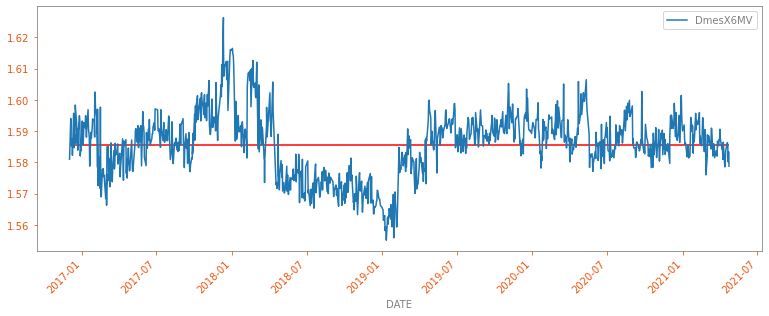

In [79]:
import matplotlib.pyplot as plt
# votre code
mean_6MV = clean_df_photon['DmesX6MV'].mean()
clean_df_photon.loc[:,['DmesX6MV']].plot(rot=45, figsize=(13,5));
plt.hlines(mean_6MV, xmin=clean_df_photon.index.min(), xmax=clean_df_photon.index.max(), color='r')
plt.show()

Afficher les débits de référence pour 6 et 23 MV sur le même graphique à l'aide de **pandas**.

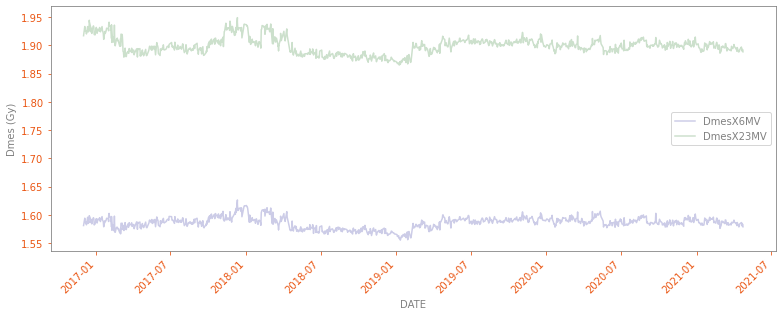

In [81]:
# votre code ici
ax = clean_df_photon.loc[:,['DmesX6MV','DmesX23MV']].plot(rot=45, figsize=(13,5), label="X 6 MV", 
                                                          alpha=0.2, color=['darkblue', 'darkgreen']);
ax.set_ylabel('Dmes (Gy)')
plt.show()

Jouons un peu avec les dates à l'aide de **pandas**.

La méthode `.resample()` permet l'aggrégation de *séries temporelles* en considérant différentes fonctions telles que la moyenne, la médiane, la somme, etc.


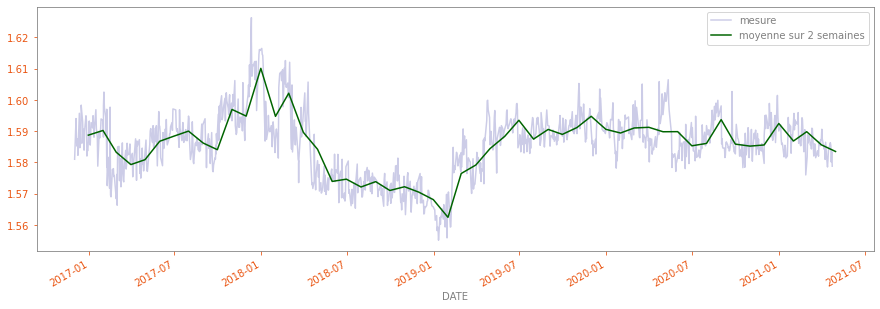

In [89]:
# votre code ici
ax = clean_df_photon.loc[:,'DmesX6MV'].plot(color='darkblue', alpha=0.2, label='mesure')
clean_df_photon.resample('M',).mean().loc[:,'DmesX6MV'].plot(color='darkgreen', 
                                                                     label='moyenne sur 2 semaines', ax=ax,
                                                                     figsize=(15,5))
plt.legend()
plt.show()

## Opérations sur les chaines de caractères

Grâce à la méthode `.info()`, on connait le type de données que la colonne `Opé.` contient: *des chaines de caractères*.

In [90]:
clean_df_photon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1074 entries, 2016-12-02 to 2021-04-23
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opé.            1074 non-null   object 
 1   Temp (°C)       1074 non-null   float64
 2   Pression (hPa)  1074 non-null   float64
 3   KT,P            1074 non-null   float64
 4   DmesX6MV        1074 non-null   float64
 5   DmesX23MV       1074 non-null   float64
dtypes: float64(5), object(1)
memory usage: 58.7+ KB


**Pandas** possède des méthodes très éfficaces car vectorisées pour le traitement de ces chaînes. Ces méthodes sont accessibles à l'aide de l'attribut `.str` apposé à la colonne. Par exemple: `.str.lower()` permet de mettre en lettres minuscules la valeur de la chaine placé avant l'attribut.

In [32]:
clean_df_photon['Opé.'].str.lower().head(3)

DATE
2016-12-02     cg
2016-12-05    dap
2016-12-06     ap
Name: Opé., dtype: object

Parmi les 1074 lignes, quels sont les différents opérateurs qui ont réalisé les contrôles de qualité ?

La méthode `.unique()` de la `Serie` (*l'équivalent d'un array 1D sous pandas*) permet d'avoir cette information.

In [92]:
clean_df_photon['Opé.'].unique()

array(['CG', 'DAP', 'AP', 'JD', 'YS', 'JD-AP-YS', 'AP-YS', 'SCH/DAP',
       'CLL', 'CG-TC', 'DAP-BF', 'BF', 'BF-TC', 'MV', 'CG-JD', 'DP',
       'JD-CLL', 'TC-BF', 'BF_TC', 'TC', 'CG TC', 'YS-DP', 'CG/SCH',
       'SCH', 'CLL-HL', 'AP-HL', 'HL-CG', 'HL', 'HL-TC', 'CD', 'BF-VP',
       'HL-AP', 'YS-HL', 'TC-YS', 'DP-HL', 'DP-BF', 'AP-HL-TC',
       'AP-HL-CG', 'AP-AD', 'HL-AO', 'AD OP', 'AD', 'AD-OP', 'AD-PO',
       'AD CG', 'PO', 'PO-AD', 'HL AP', 'PO CG', 'AD-HL', 'HL CLL', 'AM',
       'AD-BF', 'GD', 'HL CG', 'CG OB', 'CL OB', 'HL OB', 'OB', '**',
       'JS HL', 'MLG OB', 'JS', 'JS MLG', 'MLG', 'JS OB', 'JS CLL',
       'HL OB JS MLG', 'HL JS', 'OB HL', 'SC MLG', 'JS PO', 'JS ALM',
       'BG OB', 'ALM', 'HL TR', 'OB TR', 'CG DA', 'DA CG', 'TR CG',
       'HL DA', 'TR', 'DA', 'DA TR HL', ' CG', 'HL OB TR', ' HL CG'],
      dtype=object)

On observe que les mesures ont été réalisées avec un seul, deux et parfois trois opérateurs. On remarque aussi que les personnes qui ont rempli la feuille n'not pas respecté la même convention de nommage pour séparer les initiales des opérateurs (tantôt des espaces, tantôt des tirets). On observe une personne anonyme (`'**'`). 

Dans un premier temps, admettons que je souhaite conserver uniquement le premier opérateur pour simplifier le traitement.
- Quelle(s) méthode(s) de l'attribut `str` de la serie `Opé.` utiliseriez-vous ?
- Combien y-a-t-il d'opérateurs différents ?

In [93]:
# votre code ici
clean_df_photon['first_op'] = clean_df_photon['Opé.'].str.replace("/", ' ').str.replace("-", ' ').str.replace("_", ' ').str.slice(0,3).str.strip()
nb_op = len(clean_df_photon['first_op'].unique())
print(f'Il y a {nb_op} operateurs différents.')

Il y a 27 operateurs différents.


## Opérations de regroupement de données

Il est facile de calculer des informations regroupant plusieurs données (somme, moyenne, etc) en conditionnant le calcul sur une ou plusieurs informations.
Des exemples d'utilisation pourraient être :
- Combien de mesures chaque opérateur a-t-il réalisé ?
- Est-ce que les mesures de débit de référence sont différents en moyenne pour les utilisateurs ?

In [94]:
df_top_realises = (clean_df_photon.groupby('first_op')[['DmesX6MV']].count()).sort_values(by='DmesX6MV',
                                                                                 ascending=False).T
df_top_realises

first_op   HL   OB   CG  BF  AD  TC  YS  JS  MLG  PO  ...  CLL  SCH  AM  ALM  \
DmesX6MV  223  123  120  98  82  62  55  53   42  40  ...    8    8   5    4   

first_op  **  CL  GD  CD  BG  SC  
DmesX6MV   3   2   1   1   1   1  

[1 rows x 27 columns]

In [107]:
clean_df_photon.groupby('first_op')[['DmesX6MV','DmesX23MV']].mean().T

first_op         **        AD       ALM        AM        AP        BF  \
DmesX6MV   1.570345  1.577864  1.589579  1.574024  1.584919  1.584282   
DmesX23MV  1.879403  1.890269  1.899009  1.881396  1.898158  1.897187   

first_op         BG        CD        CG        CL  ...        JS       MLG  \
DmesX6MV   1.589374  1.589206  1.588269  1.565796  ...  1.587738  1.586436   
DmesX23MV  1.897215  1.897687  1.901103  1.877123  ...  1.901557  1.900319   

first_op         MV        OB        PO        SC       SCH        TC  \
DmesX6MV   1.586104  1.587460  1.575359  1.587503  1.585551  1.592119   
DmesX23MV  1.907519  1.899162  1.886137  1.900524  1.902686  1.907662   

first_op         TR        YS  
DmesX6MV   1.586843  1.587528  
DmesX23MV  1.898235  1.903294  

[2 rows x 27 columns]

In [108]:
clean_df_photon.groupby('first_op')[['DmesX6MV','DmesX23MV']].aggregate(['mean','std']).T

first_op              **        AD       ALM        AM        AP        BF  \
DmesX6MV  mean  1.570345  1.577864  1.589579  1.574024  1.584919  1.584282   
          std   0.015829  0.012938  0.005244  0.006445  0.011889  0.012080   
DmesX23MV mean  1.879403  1.890269  1.899009  1.881396  1.898158  1.897187   
          std   0.012248  0.018613  0.007492  0.006191  0.018503  0.017753   

first_op              BG        CD        CG        CL  ...        JS  \
DmesX6MV  mean  1.589374  1.589206  1.588269  1.565796  ...  1.587738   
          std        NaN       NaN  0.008577  0.001012  ...  0.006528   
DmesX23MV mean  1.897215  1.897687  1.901103  1.877123  ...  1.901557   
          std        NaN       NaN  0.012541  0.001498  ...  0.008150   

first_op             MLG        MV        OB        PO        SC       SCH  \
DmesX6MV  mean  1.586436  1.586104  1.587460  1.575359  1.587503  1.585551   
          std   0.007806  0.012493  0.007262  0.010053       NaN  0.003843   
DmesX23MV mean  1.900319  1.907519  1.899162  1.886137  1.900524  1.902686   
          std   0.008743  0.019081  0.007758  0.014175       NaN  0.015360   

first_op              TC        TR        YS  
DmesX6MV  mean  1.592119  1.586843  1.587528  
          std   0.013102  0.005200  0.006445  
DmesX23MV mean  1.907662  1.898235  1.903294  
          std   0.017897  0.006498  0.016275  

[4 rows x 27 columns]

Affichez l'évolution temporelle des débits de référence pour les X6 et X23 MV pour les 3 meilleurs réalisateurs du plus grand nombre de controles.

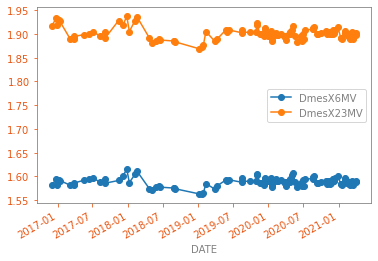

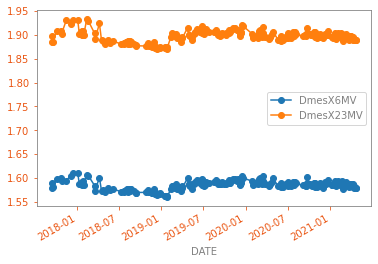

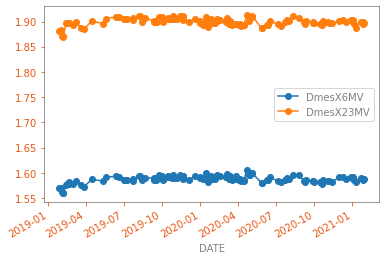

In [120]:
# on ne prend que les operateurs ayant réalisé plus de 100 mesures de débit
# votre code ici
nb_top_realises = 100
top_operator = df_top_realises[df_top_realises > nb_top_realises].dropna(axis=1)
op = list(top_operator.columns)
clean_df_photon.query('first_op in @op').groupby('first_op')[['DmesX6MV','DmesX23MV']].plot(style='o-')
plt.show()

Afficher sur un graphique les boites à moustaches des débits de références pour X6 et X23 MV pour les 3 réalisateurs du plus grand nombre de contrôles. 

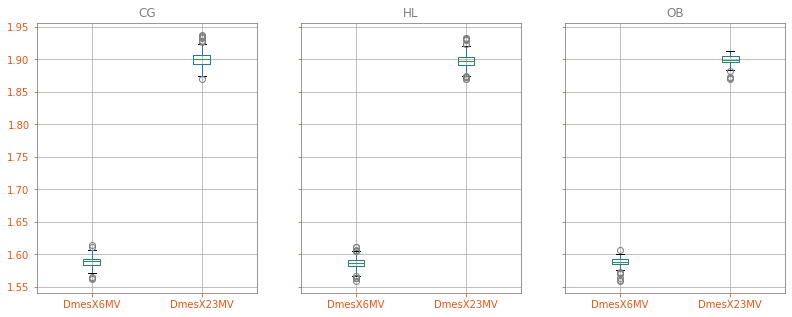

In [121]:
clean_df_photon.loc[:,['first_op','DmesX6MV','DmesX23MV']].query('first_op in @op').groupby('first_op').boxplot(layout=(1,3), figsize=(13,5))
plt.show()

- y-a-t-il des différences de débits de références mesurés par les différents opérateurs ?

In [122]:
# on importe un module pour faire des tests statistiques simples
import scipy.stats as stats

On vérifie si les distributions des mesures suivent à peu près une loi normale (gaussien)

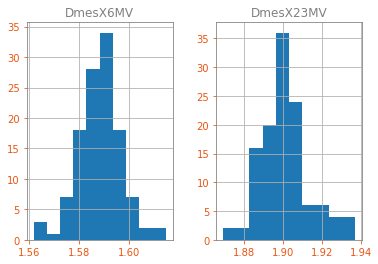

In [124]:
for operator in op:
    clean_df_photon.query(f'first_op =="{operator}"').loc[:,['DmesX6MV', 'DmesX23MV']].hist()
    plt.show()

Il existe des tests spécifiques pour faire vérifier cette hypothèse, celui de `Shapiro-wilk` notamment.

In [125]:
significative = 0.05
for operator in op:
    x6, x23 = clean_df_photon.query('first_op ==@operator').loc[:,['DmesX6MV', 'DmesX23MV']].T.values
    print(f'l\'opérateur {operator}')
    if stats.shapiro(x6).pvalue < significative:
        print(f'X6 suit une loi normale {stats.shapiro(x6).pvalue:.2f}')
    if stats.shapiro(x23).pvalue < significative:
        print(f'X23 suit une loi normale {stats.shapiro(x23).pvalue:.2f}')

l'opérateur HL
X6 suit une loi normale 0.01
X23 suit une loi normale 0.00
l'opérateur OB
X6 suit une loi normale 0.00
X23 suit une loi normale 0.00
l'opérateur CG
X6 suit une loi normale 0.03
X23 suit une loi normale 0.00


Comme les valeurs sont distribuées de façon normales, nous pouvons utiliser un test de student pour comparer 2 à 2 les moyennes des mesures des opérateurs. La valeur de p de significativité est par défaut à 5%.

In [43]:
l_pvalues = []
x6_op = clean_df_photon.reset_index().pivot(columns='first_op', values='Dmes (Gy) X6 MV')[op]
l_pvalues.append(stats.ttest_ind(x6_op[op[0]].dropna(), x6_op[op[1]].dropna()).pvalue)
l_pvalues.append(stats.ttest_ind(x6_op[op[0]].dropna(), x6_op[op[2]].dropna()).pvalue)
l_pvalues.append(stats.ttest_ind(x6_op[op[1]].dropna(), x6_op[op[2]].dropna()).pvalue)

Dans la mesure où on a opéré des tests multiples, il faut réaliser une [correction de multiplicité des tests](http://www.python-simple.com/python-statsmodels/statsmodels-multipletests.php) pour corriger les valeurs de p.

In [44]:
from statsmodels.stats import multitest

In [45]:
print(multitest.multipletests(l_pvalues))

(array([False,  True, False]), array([0.1175308, 0.0307691, 0.4276594]), 0.016952427508441503, 0.016666666666666666)


Il apparait qu'il existe une différence modérément significative entre l'opérateur 0 et 2 même après la correction des tests multiples.

Réaliser le même exercice pour l'énergie 23 MV

- y-a-t-il des différences de débits de références mesurés par les différents opérateurs ?

In [44]:
# on importe un module pour faire des tests statistiques simples
# import scipy.stats as stats

Vérifier si les distributions des mesures suivent à peu près une loi normale (gaussien). On affiche les histogrammes dans un premier temps pour avoir un aperçu visuel.

In [45]:
# for operator in op:
#     clean_df_photon.query('first_op ==@operator').loc[:,['Dmes (Gy) X6 MV', 'Dmes (Gy) X23 MV']].hist()
#     plt.show()

Il existe des tests spécifiques pour faire vérifier cette hypothèse, celui de `Shapiro-wilk` notamment.

In [46]:
significative = 0.05
# remplir les cases vides ...
# et décommenter
# for operator in op:
#     x6, x23 = clean_df_photon.query('first_op ==@operator').loc[:,['Dmes (Gy) X6 MV', 'Dmes (Gy) X23 MV']].T.values
#     print(f'l\'opérateur {operator}')
#     if ...(x6).pvalue < significative:
#         print(f'X6 suit une loi normale {stats.shapiro(x6).pvalue:.2f}')
#     if ...(x23).pvalue < significative:
#         print(f'X23 suit une loi normale {stats.shapiro(x23).pvalue:.2f}')

Comme les valeurs sont distribuées de façon normales, nous pouvons utiliser un test de student pour comparer 2 à 2 les moyennes des mesures des opérateurs. La valeur de p de significativité est par défaut à 5%.

In [47]:
# l_pvalues = []
# x6_op = clean_df_photon.reset_index().pivot(columns='first_op', values='Dmes (Gy) X6 MV')[op]
# l_pvalues.append(...(x6_op[op[0]].dropna(), x6_op[op[1]].dropna()).pvalue)
# l_pvalues.append(...(x6_op[op[0]].dropna(), x6_op[op[2]].dropna()).pvalue)
# l_pvalues.append(...(x6_op[op[1]].dropna(), x6_op[op[2]].dropna()).pvalue)

Dans la mesure où on a opéré des tests multiples, il faut réaliser une [correction de multiplicité des tests](http://www.python-simple.com/python-statsmodels/statsmodels-multipletests.php) pour corriger les valeurs de p.

In [48]:
# remplacer la place vide par la fonction adéquate
# from statsmodels.stats import multitest
# print(...(l_pvalues))

Réaliser le même exercice pour l'énergie 23 MV